***Capstone 2: Stock Market Predictions***

This capstone will complete all of the steps of the Data Science Method.

1) Problem identification <br>
2) Data wrangling <br>
3) Exploratory data analysis <br>
4) Pre-processing and training data <br>
5) Modelling <br>
6) Documentation

***1) Problem identification***

I will be using the Kaggle dataset "S&P 500 stock data". The dataset is at https://www.kaggle.com/datasets/camnugent/sandp500 and it covers 5 years of stocks including the date, open value, high value for that day, low value for that day, close value, volume, and stock name. You will see in the notebook but there are hundreds of stocks, and I will be cutting it to the first five stocks for proof of concept for the modeling process. <br>

I will develop an accurate stock price prediction system in Python to predict the stock performance over a specific period. After doing feature engineering on the dataset, I can use ARMA, ARIMA and LSTM and see how those models do. <br>

Problem statement formation <br>
● Context: The stock market is extremely lucrative. Millions of people trade on it every day, and predicting movement has the potential for lots of profit and gain. It is volatile and hard to predict however, and it is a large industry of analysts on Wall Street to make good decisions for asset managers, banks, and other traders. Can time series analysis also be of use to predict future stock prices? Stock price might not be 100% dependent on past performance, of course, but we can make a model that is helpful.<br>
● Criteria for success: This will be successful if it has more predictive power than a random walk and/or random noise.<br>
● Scope of solution space: the solution space is stock trading advice on certain stocks, and will only depend on what we can infer from the time series prediction model, rather than other factors like what’s going on with those companies and the market<br>
● Constraints: we only have stock price information for a handful of stocks and for a certain period of time so we obviously can’t predict outside of that<br>
● Stakeholders: analysts, amateur traders,  <br>
● Data sources: kaggle dataset above, can reference https://rpubs.com/kapage/523169
https://www.projectpro.io/article/stock-price-prediction-using-machine-learning-project/571 <br>
Stock Price as a Time Series Data<br>
Treating stock data as time-series, one can use past stock prices (and other parameters) to predict the stock prices for the next day or week. Machine learning models such as Recurrent Neural Networks (RNNs) or LSTMs are popular models applied to predicting time series data such as weather forecasting, election results, house prices, and, of course, stock prices. The idea is to weigh out the importance of recent and older data and determine which parameters affect the “current” or “next” day prices the most. The machine learning model assigns weights to each market feature and determines how much history the model should look at to predict future stock prices.<br>
LSTM is a Recurrent Neural Network that works on data sequences, learning to retain only relevant information from a time window.<br>


***2) Data wrangling***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
df=pd.read_csv("all_stocks_5yr.csv")
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [3]:
earliest_date = df['date'].min()
latest_date = df['date'].max()

print("Earliest date: ", earliest_date)
print("Latest date: ", latest_date)

Earliest date:  2013-02-08
Latest date:  2018-02-07


Later on when I am breaking the data into training and test data, I will use the earliest ~80% of data as training.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [5]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'name'], dtype='object')

In [6]:
# checking for missing values
print(df.isnull().sum())

date       0
open      11
high       8
low        8
close      0
volume     0
name       0
dtype: int64


Compared to the number of observations, 619,040, there are very few rows with missing values, at most 27 if the missing values are from all different rows. This is relatively negligible so I will drop these rows.

In [7]:
df.dropna(inplace=True)

In [8]:
print(df['name'].unique())

['AAL' 'AAPL' 'AAP' 'ABBV' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADSK' 'ADS' 'AEE' 'AEP' 'AES' 'AET' 'AFL' 'AGN' 'AIG' 'AIV' 'AIZ' 'AJG'
 'AKAM' 'ALB' 'ALGN' 'ALK' 'ALLE' 'ALL' 'ALXN' 'AMAT' 'AMD' 'AME' 'AMGN'
 'AMG' 'AMP' 'AMT' 'AMZN' 'ANDV' 'ANSS' 'ANTM' 'AON' 'AOS' 'APA' 'APC'
 'APD' 'APH' 'APTV' 'ARE' 'ARNC' 'ATVI' 'AVB' 'AVGO' 'AVY' 'AWK' 'AXP'
 'AYI' 'AZO' 'A' 'BAC' 'BAX' 'BA' 'BBT' 'BBY' 'BDX' 'BEN' 'BF.B' 'BHF'
 'BHGE' 'BIIB' 'BK' 'BLK' 'BLL' 'BMY' 'BRK.B' 'BSX' 'BWA' 'BXP' 'CAG'
 'CAH' 'CAT' 'CA' 'CBG' 'CBOE' 'CBS' 'CB' 'CCI' 'CCL' 'CDNS' 'CELG' 'CERN'
 'CFG' 'CF' 'CHD' 'CHK' 'CHRW' 'CHTR' 'CINF' 'CI' 'CLX' 'CL' 'CMA' 'CMCSA'
 'CME' 'CMG' 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COL' 'COO' 'COP' 'COST'
 'COTY' 'CPB' 'CRM' 'CSCO' 'CSRA' 'CSX' 'CTAS' 'CTL' 'CTSH' 'CTXS' 'CVS'
 'CVX' 'CXO' 'C' 'DAL' 'DE' 'DFS' 'DGX' 'DG' 'DHI' 'DHR' 'DISCA' 'DISCK'
 'DISH' 'DIS' 'DLR' 'DLTR' 'DOV' 'DPS' 'DRE' 'DRI' 'DTE' 'DUK' 'DVA' 'DVN'
 'DWDP' 'DXC' 'D' 'EA' 'EBAY' 'ECL' 'ED' 'EFX' 'EIX' 'E

In [9]:
len(df['name'].unique())

505

These are all the stocks included.

In [10]:
# checking for duplicate rows
df.duplicated().sum()

0

Feature Engineering - making new features such as price change

In [11]:
#https://www.kaggle.com/code/yassinesfaihi/preparing-the-data-for-stock-market-analysis/notebook 
#around line 59 there are more
df['price_change'] = df['close'] - df['open']
df['returns'] = df['close'].pct_change()
df['average_price'] = (df['close'] + df['open']) / 2
df['price_range'] = df['high'] - df['low']

In [12]:
df.describe()

,open,high,low,close,volume,price_change,returns,average_price,price_range
count,619029.000000,619029.000000,619029.000000,619029.000000,6.190290e+05,619029.000000,619028.000000,619029.000000,619029.000000
mean,83.023334,83.778419,82.256200,83.043305,4.321892e+06,0.019971,0.000543,83.033320,1.522219
std,97.378769,98.207735,96.507634,97.388913,8.693671e+06,1.558590,0.046549,97.380723,2.172627
min,1.620000,1.690000,1.500000,1.590000,1.010000e+02,-100.980000,-0.987928,1.645000,-0.255000
25%,40.220000,40.620000,39.830000,40.240800,1.070351e+06,-0.370000,-0.006809,40.230000,0.610000
50%,62.590000,63.150000,62.020000,62.620000,2.082165e+06,0.020000,0.000632,62.605000,0.990000
75%,94.370000,95.180000,93.540000,94.410000,4.284550e+06,0.420000,0.008106,94.375000,1.669900
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08,81.380000,19.664360,2046.500000,138.260000


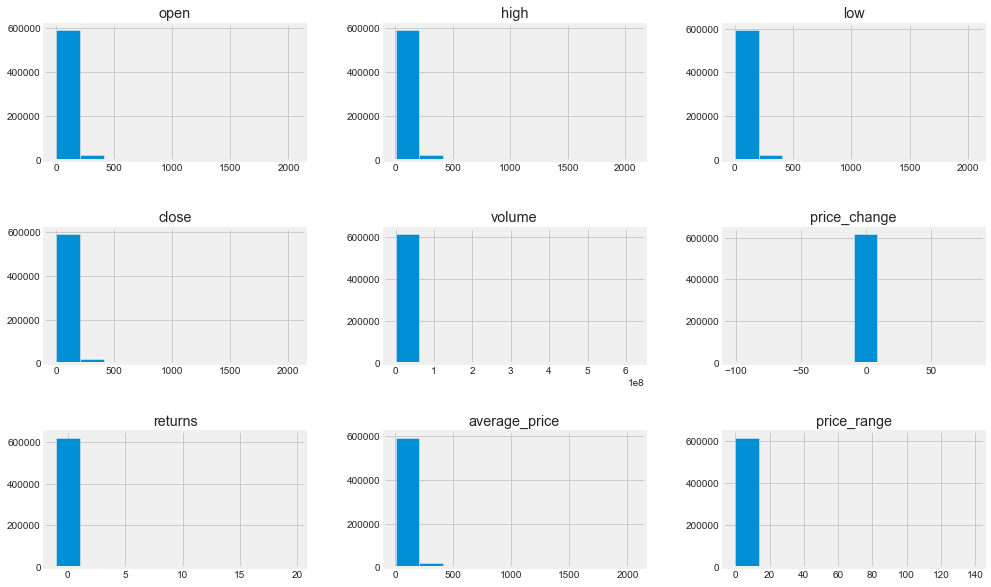

In [13]:
#visualizing the data preliminarily
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

#sns.pairplot(df)
#un-comment when it has time to load

Some are clustered towards zero, but maybe that's because of the scale/max being too high or an outlier. Let's visualize the outliers.

The IQR method is based on the interquartile range, or the difference between the 75th and 25th percentiles of the dataset. Data points that are outside of the range of 1.5IQR to 3IQR are considered outliers. I want to see the outliers of price range to consider getting rid of wildly fluctuating stocks in my training data.

In [14]:
# Calculate the interquartile range (IQR) for the 'price' column
q1 = df['price_range'].quantile(0.25)
q3 = df['price_range'].quantile(0.75)
iqr = q3 - q1

# Calculate the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify the outliers in the 'price' column
outliers = df[(df['price_range'] < lower_bound) | (df['price_range'] > upper_bound)]

# Print the outliers
print(outliers)

              date   open     high    low  close    volume name  price_change  \
422     2014-10-13  31.07  31.3900  28.10  28.58  34532913  AAL         -2.49   
425     2014-10-16  30.63  33.4000  30.00  32.97  24987103  AAL          2.34   
430     2014-10-23  37.43  40.1800  36.80  38.48  33292004  AAL          1.05   
467     2014-12-16  51.01  51.1500  47.68  47.96  22053666  AAL         -3.05   
468     2014-12-17  48.26  49.4900  46.05  48.80  24779800  AAL          0.54   
...            ...    ...      ...    ...    ...       ...  ...           ...   
618420  2015-08-24  42.51  44.9700  37.73  43.53   5725519  ZTS          1.02   
618461  2015-10-21  43.38  43.5600  39.53  41.66   9780195  ZTS         -1.72   
618847  2017-05-04  55.48  59.6025  55.48  58.87   6923157  ZTS          3.39   
618974  2017-11-02  64.30  67.8450  64.30  67.31   5185564  ZTS          3.01   
619037  2018-02-05  76.64  76.9200  73.18  73.83   2962031  ZTS         -2.81   

         returns  average_p

There are a lot of outliers because of the way I defined it with the IQR. I will choose to keep them in because it's a lot of valuable data.

<AxesSubplot:>

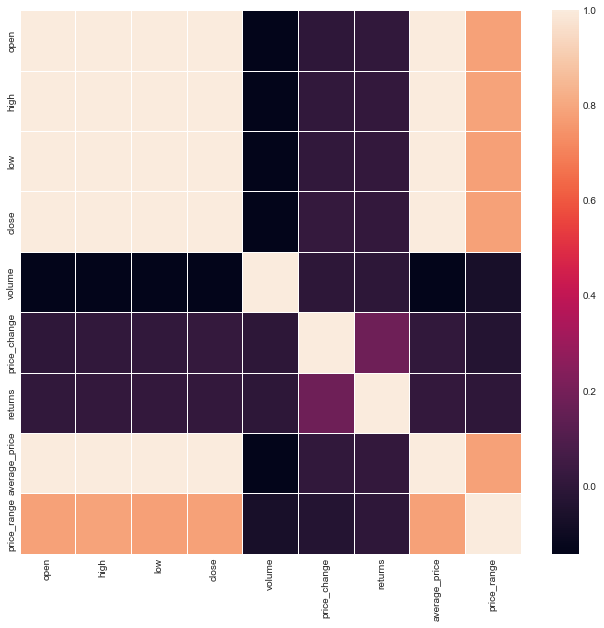

In [15]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, linewidths=.5, ax=ax)

The stock prices are correlated with themselves in a predictable way - the open and close for a single stock would be expected to be similar values.

***3) Exploratory data analysis***

We already did some EDA with pairplots and corr, but let's see some of the data more in depth.

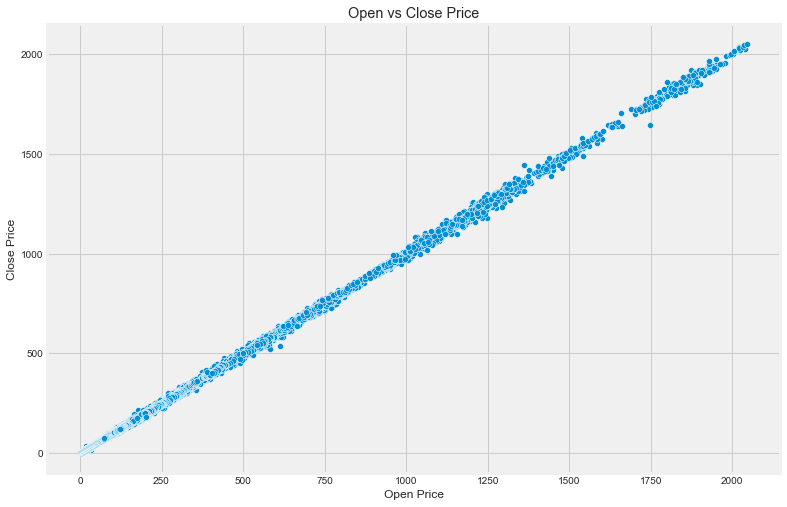

In [16]:
# set figure size
plt.figure(figsize=(11.7,8.27))

# create scatter plot
sns.scatterplot(x='open', y='close', data=df)

# add labels and title
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Open vs Close Price')

# show plot
plt.show()

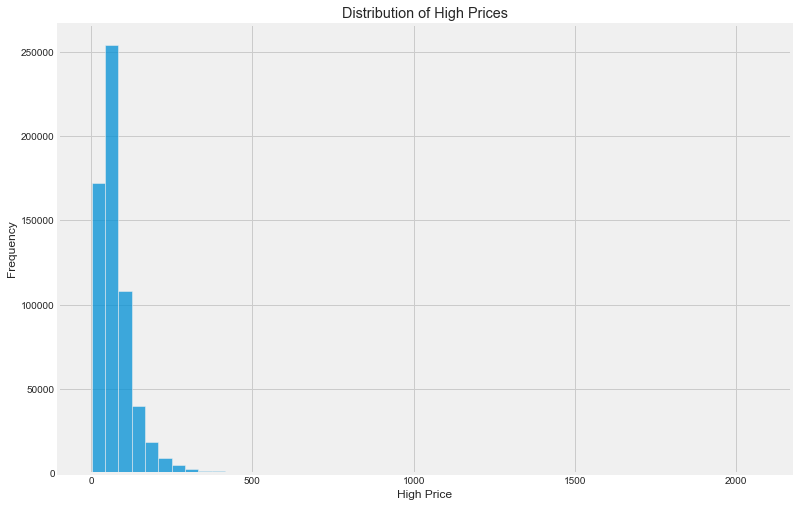

In [17]:
# import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# set figure size
plt.figure(figsize=(11.7,8.27))

# create histogram
sns.histplot(data=df['high'], bins=50)

# add labels and title
plt.xlabel('High Price')
plt.ylabel('Frequency')
plt.title('Distribution of High Prices')

# show plot
plt.show()

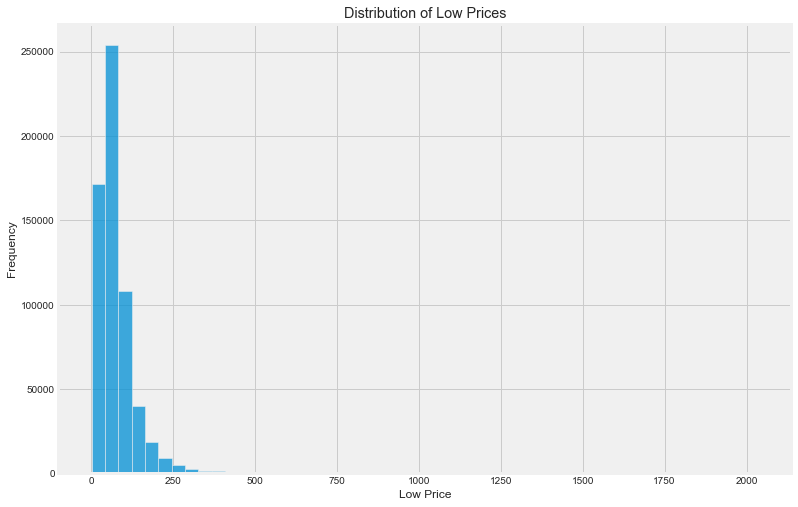

In [18]:
# set figure size
plt.figure(figsize=(11.7,8.27))

# create histogram
sns.histplot(data=df['low'], bins=50)

# add labels and title
plt.xlabel('Low Price')
plt.ylabel('Frequency')
plt.title('Distribution of Low Prices')

# show plot
plt.show()

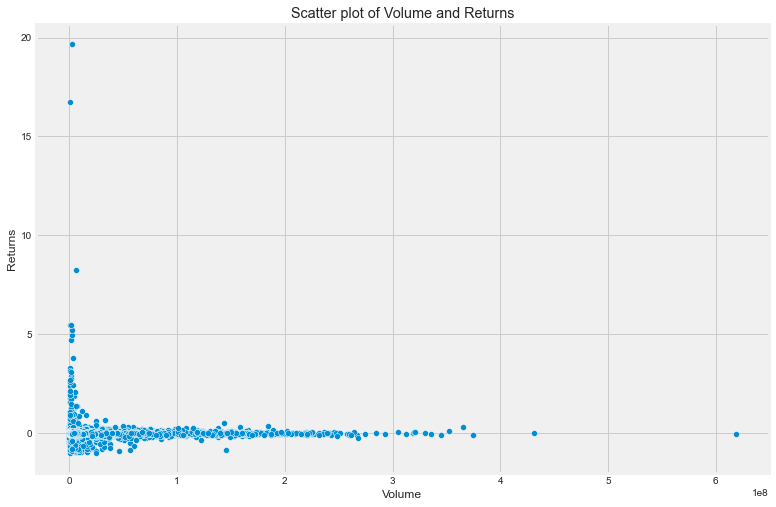

In [19]:
# set figure size
plt.figure(figsize=(11.7,8.27))

# create scatter plot
sns.scatterplot(x='volume', y='returns', data=df)

# add labels and title
plt.xlabel('Volume')
plt.ylabel('Returns')
plt.title('Scatter plot of Volume and Returns')

# show plot
plt.show()

In [20]:
#choosing 5 stocks to work with
# Create a list of the 5 stocks you want to include
selected_stocks = ['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC']

# Filter the dataframe to only include rows where the 'Stock' column is in the list of selected stocks
df = df.loc[df['name'].isin(selected_stocks)]

#there are 6295 rows now. everything works on the entire set too and if it wasn't for demonstration I would include them

Now it's time to train test split so we can work with the data to model.

In [21]:
df.describe()

,open,high,low,close,volume,price_change,returns,average_price,price_range
count,6295.000000,6295.000000,6295.000000,6295.000000,6.295000e+03,6295.000000,6294.000000,6295.000000,6295.000000
mean,84.550957,85.396175,83.706077,84.570166,1.487854e+07,0.019209,0.000606,84.560562,1.690099
std,40.196676,40.511310,39.861328,40.192771,2.518825e+07,1.214912,0.022228,40.190133,1.301319
min,13.140000,13.420000,12.700000,13.020000,1.307120e+05,-9.110000,-0.670245,13.200000,0.200000
25%,52.760000,53.375000,52.220000,52.765000,1.584827e+06,-0.520000,-0.007281,52.775000,0.912000
50%,77.200000,77.840000,76.590000,77.150000,5.269007e+06,0.030000,0.000781,77.241350,1.351000
75%,110.625000,111.875000,109.490000,110.410000,1.316181e+07,0.590000,0.009296,110.585000,2.050000
max,201.240000,201.240000,198.160000,200.380000,2.668336e+08,13.890000,0.320121,200.150000,27.395000


In [22]:
df['date'] = pd.to_datetime(df['date']) #Convert the date column to datetime format

df_train = df[df['date'] < '2017-06-01']
df_test = df[df['date'] >= '2017-06-01']
#change all df to df_train

df_train = df_train.set_index('date') #set the date column as the index

df_train = df_train.sort_index() #sort the dataframe by the index

# Normalize the data (this is optional, but it can help improve the performance of the model)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train[['open','high','low','close','volume', 'price_change', 'returns', 'average_price', 'price_range']] = scaler.fit_transform(df_train[['open','high','low','close','volume', 'price_change', 'returns', 'average_price', 'price_range']])

I didn't use train test split because it would have made the training random dates and not be helpful with predicting more random test set dates.

***4) Pre-processing and training data***

In [23]:
df_train.columns

Index(['open', 'high', 'low', 'close', 'volume', 'name', 'price_change',
       'returns', 'average_price', 'price_range'],
      dtype='object')

In [24]:
df_test.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'name',
       'price_change', 'returns', 'average_price', 'price_range'],
      dtype='object')

In [25]:
df

,date,open,high,low,close,volume,name,price_change,returns,average_price,price_range
0,2013-02-08,15.07,15.12,14.6300,14.75,8407500,AAL,-0.32,NaN,14.910,0.4900
1,2013-02-11,14.89,15.01,14.2600,14.46,8882000,AAL,-0.43,-0.019661,14.675,0.7500
2,2013-02-12,14.45,14.51,14.1000,14.27,8126000,AAL,-0.18,-0.013140,14.360,0.4100
3,2013-02-13,14.30,14.94,14.2500,14.66,10259500,AAL,0.36,0.027330,14.480,0.6900
4,2013-02-14,14.94,14.96,13.1600,13.99,31879900,AAL,-0.95,-0.045703,14.465,1.8000
...,...,...,...,...,...,...,...,...,...,...,...
6290,2018-02-01,97.74,99.81,95.7300,99.29,2786798,ABC,1.55,-0.003813,98.515,4.0800
6291,2018-02-02,99.09,99.09,95.9100,96.02,1660267,ABC,-3.07,-0.032934,97.555,3.1800
6292,2018-02-05,95.62,96.52,91.6900,91.90,2278534,ABC,-3.72,-0.042908,93.760,4.8300
6293,2018-02-06,92.58,93.37,86.9403,91.54,4574997,ABC,-1.04,-0.003917,92.060,6.4297


In [26]:
df_train

,open,high,low,close,volume,name,price_change,returns,average_price,price_range
date,,,,,,,,,,
2013-02-08,0.010260,0.009051,0.010407,0.009234,0.031034,AAL,0.382174,NaN,0.009147,0.010664
2013-02-08,0.290134,0.292735,0.292207,0.292668,0.592561,AAPL,0.402174,1.000000,0.291972,0.048119
2013-02-08,0.177459,0.178229,0.182034,0.180775,0.004132,ABC,0.412174,0.083743,0.179219,0.008641
2013-02-08,0.346624,0.352998,0.352151,0.351623,0.004377,AAP,0.420435,0.166395,0.349933,0.055525
2013-02-08,0.123498,0.122458,0.124690,0.123986,0.051473,ABBV,0.390870,0.000000,0.123616,0.014525
...,...,...,...,...,...,...,...,...,...,...
2017-05-31,0.643275,0.649452,0.641216,0.643734,0.007453,AAP,0.373913,0.681624,0.645547,0.131642
2017-05-31,0.748698,0.749388,0.753154,0.745837,0.091189,AAPL,0.343478,0.670786,0.749746,0.058467
2017-05-31,0.186390,0.186668,0.187803,0.188888,0.016331,AAL,0.405217,0.686239,0.187777,0.027579


In [27]:
df_test

,date,open,high,low,close,volume,name,price_change,returns,average_price,price_range
1085,2017-06-01,48.50,49.36,48.3000,49.05,4421404,AAL,0.55,0.013220,48.775,1.0600
1086,2017-06-02,49.56,50.47,49.3700,49.52,7708567,AAL,-0.04,0.009582,49.540,1.1000
1087,2017-06-05,49.53,49.95,49.4000,49.74,5466685,AAL,0.21,0.004443,49.635,0.5500
1088,2017-06-06,49.47,50.10,49.3200,49.74,4473456,AAL,0.27,0.000000,49.605,0.7800
1089,2017-06-07,49.44,50.91,48.8000,50.86,7078405,AAL,1.42,0.022517,50.150,2.1100
...,...,...,...,...,...,...,...,...,...,...,...
6290,2018-02-01,97.74,99.81,95.7300,99.29,2786798,ABC,1.55,-0.003813,98.515,4.0800
6291,2018-02-02,99.09,99.09,95.9100,96.02,1660267,ABC,-3.07,-0.032934,97.555,3.1800
6292,2018-02-05,95.62,96.52,91.6900,91.90,2278534,ABC,-3.72,-0.042908,93.760,4.8300
6293,2018-02-06,92.58,93.37,86.9403,91.54,4574997,ABC,-1.04,-0.003917,92.060,6.4297


The X will be all the columns besides close, and close is the y. Here is each of the stocks in the training data plotted (should I be plotting for all time with df instead of df_train)?

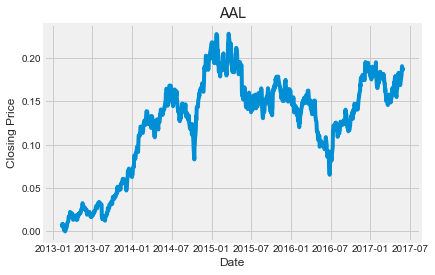

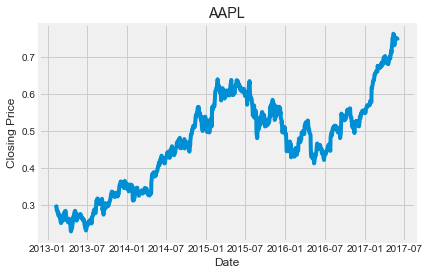

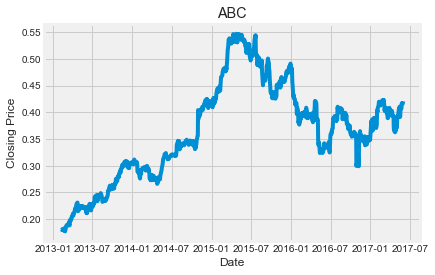

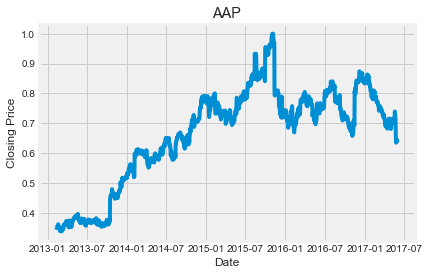

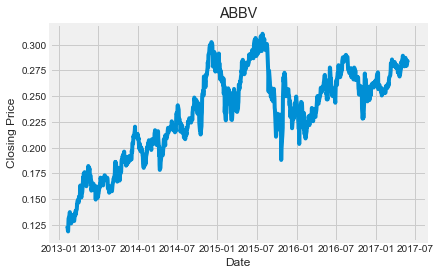

In [28]:
names = df_train['name'].unique() # get unique list of stock names
for name in names:
    # filter dataframe for each stock
    stock_df = df_train[df_train['name'] == name]
    
    # create plot
    plt.plot(stock_df.index, stock_df['close'])
    plt.title(name)
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.show()

In these graphs the trend is mostly upward and non-stationary, but there is variation between the graphs. some seasonal fluctations? there is also noise. additive or multiplicative?

***5) Modelling***

Model 1 - ARMA

In [29]:
import statsmodels.api as sm
import itertools
from sklearn.metrics import mean_squared_error


import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings("ignore")

# Create a dictionary to store the ARMA models for each stock
arma_models = {}

# Define the orders to test for the ARMA model
p = range(0, 3)
q = range(0, 3)
orders = list(itertools.product(p, q))

# Loop through each stock in the dataframe
for stock in df_train['name'].unique():

    # Filter the dataframe to only include the current stock
    stock_df = df_train[df_train['name'] == stock]['close']

    # Train multiple ARMA models with different orders
    best_aic = float('inf')
    best_order = None
    best_model = None

    for order in orders:
        try:
            arma_model = sm.tsa.SARIMAX(stock_df, order=(order[0], 0, order[1])).fit()
            if arma_model.aic < best_aic:
                best_aic = arma_model.aic
                best_order = order
                best_model = arma_model
        except Exception as e:
            print(f"Error fitting ARMA model for {stock} with order {order}: {e}")
            continue

    # Store the best model in the dictionary with the stock name as the key
    arma_models[stock] = best_model

    # Print the summary of the best model
    if best_model is not None:
        print(f"Summary of best ARMA model for {stock}:")
        print(best_model.summary())

    # Predict the test data using the best model
    if stock in df_test['name'].unique():
        test_stock_df = df_test[df_test['name'] == stock]['close']
        pred = best_model.predict(start=len(df_train), end=len(df_train)+len(test_stock_df)-1)
        mse_score = mean_squared_error(test_stock_df, pred)
        print(f"MSE score for {stock}: {mse_score}")

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.63177D-01    |proj g|=  5.26734D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1     15      1     0     0   5.267D-04  -5.632D-01
  F = -0.56317684922351330     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.6

 This problem is unconstrained.



At iterate   15    f= -1.80085D+00    |proj g|=  1.45080D-01

At iterate   20    f= -1.80150D+00    |proj g|=  2.91669D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     32      1     0     0   7.017D-07  -1.802D+00
  F =  -1.8015038721509726     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.45109D+02    |proj g|=  1.94835D+05


 This problem is unconstrained.



At iterate    5    f= -2.21919D+00    |proj g|=  1.00354D+01

At iterate   10    f= -3.20703D+00    |proj g|=  9.18208D+00

At iterate   15    f= -3.89313D+00    |proj g|=  3.47092D+01

At iterate   20    f= -3.95637D+00    |proj g|=  1.29596D+00

At iterate   25    f= -3.96072D+00    |proj g|=  7.62511D-01

At iterate   30    f= -3.96089D+00    |proj g|=  2.24243D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     32     71      1     0     0   2.776D-03  -3.961D+00
  F =  -3.9608871899371181     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f= -3.01409D+00    |proj g|=  8.21307D+00

At iterate   15    f= -3.01719D+00    |proj g|=  5.28515D-01

At iterate   20    f= -3.69171D+00    |proj g|=  3.10711D+01

At iterate   25    f= -3.93886D+00    |proj g|=  1.25370D+01

At iterate   30    f= -3.96008D+00    |proj g|=  4.24147D-01

At iterate   35    f= -3.96266D+00    |proj g|=  3.04308D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     39     96      1     0     0   2.354D-02  -3.963D+00
  F =  -3.9626799650870326     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -2.01905D+00    |proj g|=  5.46834D+00

At iterate   10    f= -2.88812D+00    |proj g|=  5.47683D+00

At iterate   15    f= -3.01584D+00    |proj g|=  2.35858D+01

At iterate   20    f= -3.75926D+00    |proj g|=  4.27289D+00

At iterate   25    f= -3.76487D+00    |proj g|=  2.53707D+00

At iterate   30    f= -3.80299D+00    |proj g|=  2.40521D+01

At iterate   35    f= -3.92165D+00    |proj g|=  2.04802D+01

At iterate   40    f= -3.93757D+00    |proj g|=  1.88793D+01

At iterate   45    f= -3.96200D+00    |proj g|=  2.72766D+00

At iterate   50    f= -3.96338D+00    |proj g|=  3.83997D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -2.32297D+00    |proj g|=  9.53873D+00

At iterate   10    f= -3.47017D+00    |proj g|=  2.57549D+01

At iterate   15    f= -3.61146D+00    |proj g|=  7.79588D-01

At iterate   20    f= -3.61217D+00    |proj g|=  1.46978D-02

At iterate   25    f= -3.61517D+00    |proj g|=  3.63556D+00

At iterate   30    f= -3.95417D+00    |proj g|=  7.02066D-01

At iterate   35    f= -3.96232D+00    |proj g|=  3.49144D-01

At iterate   40    f= -3.96280D+00    |proj g|=  1.27008D-01

At iterate   45    f= -3.96281D+00    |proj g|=  6.41147D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     45     84   

 This problem is unconstrained.


  ys=-5.286E-01  -gs= 1.113E+00 BFGS update SKIPPED

At iterate    5    f= -3.88486D-01    |proj g|=  2.34549D+00
  ys=-7.792E+00  -gs= 1.337E+00 BFGS update SKIPPED

At iterate   10    f= -3.65523D+00    |proj g|=  1.91960D+00

At iterate   15    f= -3.94174D+00    |proj g|=  4.35151D+00

At iterate   20    f= -3.96018D+00    |proj g|=  2.62834D-01

At iterate   25    f= -3.96078D+00    |proj g|=  1.51888D-01

At iterate   30    f= -3.96078D+00    |proj g|=  4.73424D-03

At iterate   35    f= -3.96078D+00    |proj g|=  7.62542D-02

At iterate   40    f= -3.96079D+00    |proj g|=  7.82758D-01

At iterate   45    f= -3.96089D+00    |proj g|=  1.66703D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function v


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


  ys=-1.617E+00  -gs= 8.840E-01 BFGS update SKIPPED

At iterate    5    f= -1.03966D+00    |proj g|=  4.11516D+00

At iterate   10    f= -3.22850D+00    |proj g|=  1.52645D+00

At iterate   15    f= -3.53216D+00    |proj g|=  1.99493D+01

At iterate   20    f= -3.53663D+00    |proj g|=  1.36531D+00

At iterate   25    f= -3.54562D+00    |proj g|=  1.58203D+01

At iterate   30    f= -3.94877D+00    |proj g|=  1.43810D+01

At iterate   35    f= -3.95078D+00    |proj g|=  1.43779D+00

At iterate   40    f= -3.95465D+00    |proj g|=  2.52533D+00

At iterate   45    f= -3.95840D+00    |proj g|=  6.06711D-01

At iterate   50    f= -3.95849D+00    |proj g|=  2.60106D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1     16      1     0     0   4.251D-05   6.952D-01
  F =  0.69516781542909423     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.95169D-01    |proj g|=  9.96564D-01

At iterate    5    f=  7.81857D-02    |proj g|=  2.81223D-01

At iterate   10    f=  1.73546D-02    |proj g|=  6.21207D-02

At iterate   15    f=  1.40729D-02    |proj g|=  5.31804D-03

       

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.95172D-01    |proj g|=  9.94408D-01

At iterate    5    f= -5.39876D-01    |proj g|=  4.58850D-01

At iterate   10    f= -5.90641D-01    |proj g|=  2.16742D-03

At iterate   15    f= -5.90676D-01    |proj g|=  4.16572D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     63      2     0     0   2.681D-04  -5.907D-01
  F = -0.59068791256200581     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.89770D+03    |proj g|=  4.82636D+05

At iterate    5    f=  9.61300D-04    |proj g|=  1.26399D+00
  ys=-2.566E-01  -gs= 7.977E-01 BFGS update SKIPPED

At iterate   10    f= -3.40228D+00    |proj g|=  3.75506D+00

At iterate   15  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -1.25719D+00    |proj g|=  3.10693D+00

At iterate   10    f= -2.47564D+00    |proj g|=  1.23983D+01

At iterate   15    f= -2.60557D+00    |proj g|=  2.25598D+00

At iterate   20    f= -3.33351D+00    |proj g|=  6.52266D+01

At iterate   25    f= -3.41358D+00    |proj g|=  5.79943D-01

At iterate   30    f= -3.42050D+00    |proj g|=  3.72798D-01

At iterate   35    f= -3.42170D+00    |proj g|=  2.66385D-02

At iterate   40    f= -3.42178D+00    |proj g|=  5.70236D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     40     78      1     0     0   5.702D-04  -3.422D+00
  F =  -3.42177824757

 This problem is unconstrained.



At iterate    5    f= -6.78481D-01    |proj g|=  4.91206D+00

At iterate   10    f= -2.18645D+00    |proj g|=  5.32706D+00

At iterate   15    f= -2.83060D+00    |proj g|=  2.82817D+00

At iterate   20    f= -3.32333D+00    |proj g|=  4.82425D+00

At iterate   25    f= -3.40366D+00    |proj g|=  2.52109D+00

At iterate   30    f= -3.41227D+00    |proj g|=  2.64470D-01

At iterate   35    f= -3.41737D+00    |proj g|=  8.88475D+00

At iterate   40    f= -3.42156D+00    |proj g|=  1.64763D+00

At iterate   45    f= -3.42183D+00    |proj g|=  2.25526D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     48    100      1     0     0   2.450D-02  -3.422D+00
  F =  -3.4218294294125817     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.89696D+03    |proj g|=  4.82354D+05

At iterate    5    f= -1.03181D+00    |proj g|=  3.31669D+00

At iterate   10    f= -2.65325D+00    |proj g|=  2.58064D+01

At iterate   15    f= -3.06888D+00    |proj g|=  3.68620D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     46    104      1     0     0   7.659D-03  -3.422D+00
  F =  -3.4217731597268064     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.04586D+02    |proj g|=  1.54302D+05

At iterate    5    f= -1.50301D+00    |proj g|=  1.17936D+00

At iterate   10    f= -3.13580D+00    |proj g|=  2.58615D+01

At iterate   15    f= -3.36572D+00    |proj g|=  1.75047D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36    142      2     1     0   3.761D-02  -3.415D+00
  F =  -3.4145957632653183     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.67485D+06    |proj g|=  9.31810D+08


 This problem is unconstrained.



At iterate    5    f=  1.69197D+01    |proj g|=  3.96336D+01

At iterate   10    f=  1.93757D+00    |proj g|=  1.34899D+00

At iterate   15    f= -7.38877D-01    |proj g|=  8.86517D-01

At iterate   20    f= -1.26155D+00    |proj g|=  5.59920D+00
  ys=-1.364E+00  -gs= 8.036E-01 BFGS update SKIPPED

At iterate   25    f= -3.34339D+00    |proj g|=  9.39311D+00

At iterate   30    f= -3.37319D+00    |proj g|=  5.10216D+00

At iterate   35    f= -3.41420D+00    |proj g|=  1.62455D-01

At iterate   40    f= -3.41757D+00    |proj g|=  5.75209D-01

At iterate   45    f= -3.41769D+00    |proj g|=  3.06491D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate   15    f= -2.42608D-01    |proj g|=  1.14770D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19     27      1     0     0   7.349D-06  -2.426D-01
  F = -0.24262004509623164     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.74293D-03    |proj g|=  2.34037D+00

At iterate    5    f= -6.40629D-01    |proj g|=  2.25224D-01


 This problem is unconstrained.



At iterate   10    f= -6.82793D-01    |proj g|=  2.72141D+00

At iterate   15    f= -7.56126D-01    |proj g|=  6.67397D-04

At iterate   20    f= -7.56128D-01    |proj g|=  2.50484D-02

At iterate   25    f= -7.56322D-01    |proj g|=  1.64471D-01

At iterate   30    f= -7.56514D-01    |proj g|=  7.45930D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     89      2     0     0   1.146D-04  -7.565D-01
  F = -0.75651389655353907     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.06724D+03    |proj g|=  7.08137D+05

At iterate    5    f= -2.58322D+00    |proj g|=  2.38301D+01

At iterate   10    f= -3.47577D+00    |proj g|=  1.15388D+02

At iterate   15    f= -3.68612D+00    |proj g|=  3.77684D+00

At iter

 This problem is unconstrained.



At iterate    5    f= -1.28467D+00    |proj g|=  1.16640D+00

At iterate   10    f= -2.70103D+00    |proj g|=  5.12051D+00

At iterate   15    f= -3.16217D+00    |proj g|=  3.41660D+00

At iterate   20    f= -3.18779D+00    |proj g|=  8.57610D+00

At iterate   25    f= -3.70973D+00    |proj g|=  2.12382D+01

At iterate   30    f= -3.71944D+00    |proj g|=  3.76619D-01

At iterate   35    f= -3.72056D+00    |proj g|=  3.73904D+00

At iterate   40    f= -3.72120D+00    |proj g|=  7.87553D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     44     97      1     0     0   8.070D-03  -3.721D+00
  F =  -3.72120824163


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -1.49474D+00    |proj g|=  5.28693D+00

At iterate   10    f= -2.88671D+00    |proj g|=  2.51914D+00

At iterate   15    f= -2.96518D+00    |proj g|=  4.22387D-01

At iterate   20    f= -3.26474D+00    |proj g|=  2.20388D+01

At iterate   25    f= -3.61798D+00    |proj g|=  8.64903D-01

At iterate   30    f= -3.63013D+00    |proj g|=  1.31105D+00

At iterate   35    f= -3.64888D+00    |proj g|=  8.89536D+00

At iterate   40    f= -3.71264D+00    |proj g|=  8.64835D+00

At iterate   45    f= -3.72092D+00    |proj g|=  4.25377D-01

At iterate   50    f= -3.72172D+00    |proj g|=  1.26806D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -8.96283D-01    |proj g|=  4.85152D+00

At iterate   10    f= -3.02319D+00    |proj g|=  3.76053D+00

At iterate   15    f= -3.37693D+00    |proj g|=  1.60420D+01

At iterate   20    f= -3.39220D+00    |proj g|=  3.20094D-01

At iterate   25    f= -3.39258D+00    |proj g|=  3.31674D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     76      1     0     0   7.452D-02  -3.393D+00
  F =  -3.3926002321547912     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.06396D+03    |proj g|=  7.06456D+05

At iterate    5    f= -1.54811D+00    |proj g|=  1.15989D+01

At iterate   10    f= -3.52712D+00    |proj g|=  2.35663D+00

At iterate   15    f= -3.70347D+00    |proj g|=  4.59811D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31    135      2     1     0   1.792D-01  -3.720D+00
  F =  -3.7197590437067625     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.16971D+03    |proj g|=  7.41441D+05
  ys=-3.430E-01  -gs= 1.111E+00 BFGS update SKIPPED

At iterate    5    f= -4.93525D-01    |proj g|=  2.88149D+00
  ys=-5.171E+00  -gs= 9.919E-01 BFGS update SKIPPED

At iterate   10    f= -3.25


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03696D+00    |proj g|=  9.96913D-01

At iterate    5    f=  3.84556D-01    |proj g|=  2.75650D-02

At iterate   10    f=  3.59754D-01    |proj g|=  4.65689D-03

At iterate   15    f=  3.57967D-01    |proj g|=  1.80161D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     17     24      1     0     0   3.366D-07   3.580D-01
  F =  0.35796719152715345     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     64      2     0     0   1.378D-04  -2.329D-01
  F = -0.23285267762358666     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43470D+03    |proj g|=  2.25674D+05

At iterate    5    f= -1.28235D+00    |proj g|=  2.89243D+00

At iterate   10    f= -2.60585D+00    |proj g|=  1.60212D+00

At iterate   15    f= -2.89850D+00    |proj g|=  1.65832D+00

At iter

 This problem is unconstrained.



At iterate    5    f= -1.58573D+00    |proj g|=  9.08294D+00

At iterate   10    f= -2.34375D+00    |proj g|=  4.34504D+00

At iterate   15    f= -2.74455D+00    |proj g|=  3.19169D+01

At iterate   20    f= -2.92021D+00    |proj g|=  3.99404D+00

At iterate   25    f= -2.94025D+00    |proj g|=  7.25078D-01

At iterate   30    f= -2.94184D+00    |proj g|=  1.93504D-01

At iterate   35    f= -2.94193D+00    |proj g|=  1.10083D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     36     63      1     0     0   8.967D-03  -2.942D+00
  F =  -2.9419272077431575     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -9.45637D-01    |proj g|=  7.85781D+00

At iterate   10    f= -1.64220D+00    |proj g|=  6.52824D-01

At iterate   15    f= -2.43758D+00    |proj g|=  2.43580D+01

At iterate   20    f= -2.53114D+00    |proj g|=  8.18867D-01

At iterate   25    f= -2.56314D+00    |proj g|=  5.38525D+00

At iterate   30    f= -2.93188D+00    |proj g|=  1.05862D+01

At iterate   35    f= -2.93856D+00    |proj g|=  1.18276D+00

At iterate   40    f= -2.94056D+00    |proj g|=  1.93773D+00

At iterate   45    f= -2.94125D+00    |proj g|=  2.29668D+00

At iterate   50    f= -2.94412D+00    |proj g|=  3.20240D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f= -2.59310D+00    |proj g|=  1.14735D+00

At iterate   15    f= -2.60434D+00    |proj g|=  8.23307D-03

At iterate   20    f= -2.60449D+00    |proj g|=  4.45710D-01

At iterate   25    f= -2.88607D+00    |proj g|=  2.33475D+01

At iterate   30    f= -2.93752D+00    |proj g|=  7.99435D-01

At iterate   35    f= -2.94177D+00    |proj g|=  1.27566D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   40    f= -2.94190D+00    |proj g|=  6.75818D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     40     95      1     0     0   6.758D-03  -2.942D+00
  F =  -2.9419032219365810     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43868D+03    |proj g|=  2.26610D+05

At iterate    5    f= -1.36299D+00    |proj g|=  2.16641D+01

At iterate   10    f= -2.81795D+00    |proj g|=  3.12833D+01

At iter

 This problem is unconstrained.


  ys=-1.606E+00  -gs= 9.784E-01 BFGS update SKIPPED

At iterate    5    f= -2.35801D+00    |proj g|=  5.37861D-01

At iterate   10    f= -2.76840D+00    |proj g|=  4.16295D+00

At iterate   15    f= -2.92387D+00    |proj g|=  1.44228D-01

At iterate   20    f= -2.92394D+00    |proj g|=  1.02472D+00

At iterate   25    f= -2.92881D+00    |proj g|=  7.03905D+00

At iterate   30    f= -2.93725D+00    |proj g|=  1.43219D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     57      1     1     0   1.432D+00  -2.937D+00
  F =  -2.9372527918357996     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate   10    f= -6.98657D-01    |proj g|=  1.41320D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     26      1     0     0   3.607D-04  -6.987D-01
  F = -0.69866026150373650     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.54065D-01    |proj g|=  3.69505D+00

At iterate    5    f= -1.21580D+00    |proj g|=  5.30011D+00



 This problem is unconstrained.


At iterate   10    f= -1.28521D+00    |proj g|=  1.56756D-01

At iterate   15    f= -1.28527D+00    |proj g|=  5.63986D-02

At iterate   20    f= -1.28589D+00    |proj g|=  6.63548D-01

At iterate   25    f= -1.28768D+00    |proj g|=  9.61065D-02

At iterate   30    f= -1.29070D+00    |proj g|=  2.04264D+00

At iterate   35    f= -1.30609D+00    |proj g|=  7.09093D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     39     54      1     0     0   1.208D-06  -1.306D+00
  F =  -1.3061005256212552     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine

 This problem is unconstrained.



At iterate   10    f= -3.42147D+00    |proj g|=  4.02662D+01

At iterate   15    f= -3.85206D+00    |proj g|=  1.46903D+01

At iterate   20    f= -3.87572D+00    |proj g|=  5.21264D-01

At iterate   25    f= -3.87764D+00    |proj g|=  7.09505D-02

At iterate   30    f= -3.87776D+00    |proj g|=  1.33695D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     31     64      1     0     0   9.041D-05  -3.878D+00
  F =  -3.8777611827802900     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.


  ys=-6.762E-02  -gs= 7.131E-01 BFGS update SKIPPED

At iterate    5    f= -3.10550D-01    |proj g|=  6.48206D+00

At iterate   10    f= -3.13491D+00    |proj g|=  3.31099D+01

At iterate   15    f= -3.38530D+00    |proj g|=  1.36927D+01

At iterate   20    f= -3.77008D+00    |proj g|=  2.20387D+01

At iterate   25    f= -3.86901D+00    |proj g|=  3.06482D+00

At iterate   30    f= -3.87710D+00    |proj g|=  1.40526D+00

At iterate   35    f= -3.87800D+00    |proj g|=  6.36884D-02

At iterate   40    f= -3.87802D+00    |proj g|=  6.09147D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     40     75      1     1

 This problem is unconstrained.



At iterate    5    f= -1.04323D+00    |proj g|=  1.33284D+00

At iterate   10    f= -2.73702D+00    |proj g|=  1.72254D+01

At iterate   15    f= -2.78273D+00    |proj g|=  2.95495D+00

At iterate   20    f= -3.33571D+00    |proj g|=  1.40761D+01

At iterate   25    f= -3.82294D+00    |proj g|=  1.04256D+01

At iterate   30    f= -3.84325D+00    |proj g|=  6.91221D-01

At iterate   35    f= -3.84846D+00    |proj g|=  3.40007D+00

At iterate   40    f= -3.87825D+00    |proj g|=  4.20006D-01

At iterate   45    f= -3.87831D+00    |proj g|=  8.28653D-01

At iterate   50    f= -3.87839D+00    |proj g|=  1.13850D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f= -2.48001D+00    |proj g|=  9.07147D+00

At iterate   10    f= -3.49994D+00    |proj g|=  5.91187D+00

At iterate   15    f= -3.55941D+00    |proj g|=  4.86307D-01

At iterate   20    f= -3.56000D+00    |proj g|=  2.28403D-02

At iterate   25    f= -3.56012D+00    |proj g|=  2.87268D-01

At iterate   30    f= -3.84374D+00    |proj g|=  4.95196D+01

At iterate   35    f= -3.87245D+00    |proj g|=  2.27184D+00

At iterate   40    f= -3.87749D+00    |proj g|=  9.56717D-01

At iterate   45    f= -3.87800D+00    |proj g|=  3.29201D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     47    103      1     1     0   2.769D-01  -3.878D+00
  F =  -3.8780073923270884     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12587D+03    |proj g|=  4.51193D+05

At iterate    5    f= -1.65889D+00    |proj g|=  3.02171D+00

At iterate   10    f= -3.12174D+00    |proj g|=  2.84949D+01

At iterate   15    f= -3.71812D+00    |proj g|=  2.82372D+01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -1.34035D+00    |proj g|=  1.22484D+01

At iterate   10    f= -3.13153D+00    |proj g|=  3.17954D+01

At iterate   15    f= -3.32140D+00    |proj g|=  4.03264D-01

At iterate   20    f= -3.33449D+00    |proj g|=  1.16754D+01

At iterate   25    f= -3.86968D+00    |proj g|=  3.57769D+00

At iterate   30    f= -3.87016D+00    |proj g|=  4.21245D-01

At iterate   35    f= -3.87393D+00    |proj g|=  3.04728D-01

At iterate   40    f= -3.87431D+00    |proj g|=  3.60578D-01

At iterate   45    f= -3.87431D+00    |proj g|=  6.10923D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47    100   

Scoring ARMA model - from the output above, there is a best model for each stock such as SARIMAX(1, 0, 0) for ABBV. The MSE for each model is below.

In [30]:
from sklearn.metrics import mean_squared_error
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings("ignore")
# Create a dictionary to store the MSE scores for each stock
mse_scores = {}

# Loop through each stock in the dataframe
for stock in df_test['name'].unique():

    # Filter the dataframe to only include the current stock
    stock_df = df_test[df_test['name'] == stock]['close']

    # Use the best ARMA model to predict the test data
    arma_model = arma_models.get(stock)
    if arma_model is None:
        print(f"No ARMA model found for {stock}. Skipping.")
        continue
    pred = arma_model.predict(start=len(df_train), end=len(df_train)+len(stock_df)-1)

    # Calculate the MSE score and store it in the dictionary
    mse_score = mean_squared_error(stock_df, pred)
    mse_scores[stock] = mse_score

    # Print the MSE score
    print(f"MSE score for {stock}: {mse_score}")

MSE score for AAL: 2500.3323356590035
MSE score for AAPL: 25897.155535940266
MSE score for AAP: 10768.315414664408
MSE score for ABBV: 7659.775864189195
MSE score for ABC: 7647.104895228071


ARMA:<br>

Summary of best ARMA model for AAL:
SARIMAX(2, 0, 0)  <br>

Summary of best ARMA model for AAPL:
SARIMAX(1, 0, 0)<br>

Summary of best ARMA model for ABC:
SARIMAX(1, 0, 0)<br>

Summary of best ARMA model for AAP:
SARIMAX(1, 0, 2)<br>

Summary of best ARMA model for ABBV:
SARIMAX(1, 0, 0) <br>


MSE score for AAL: 2500.3323356590035<br>
MSE score for AAPL: 25897.155535940266<br>
MSE score for AAP: 10768.315414664408<br>
MSE score for ABBV: 7659.775864189195<br>
MSE score for ABC: 7647.104895228071<br>


In [31]:
#Model 2 - ARIMA
import statsmodels.api as sm
import itertools
from sklearn.metrics import mean_squared_error


import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings("ignore")



# Create a dictionary to store the ARIMA models for each stock
arima_models = {}

# Define the orders to test for the ARIMA model
p = range(0, 3)
d = range(0, 3)
q = range(0, 3)
orders = list(itertools.product(p, d, q))

# Loop through each stock in the dataframe
for stock in df_train['name'].unique():

    # Filter the dataframe to only include the current stock
    stock_df = df_train[df_train['name'] == stock]['close']

    # Train multiple ARIMA models with different orders
    best_aic = float('inf')
    best_order = None
    best_model = None

    for order in orders:
        try:
            arima_model = sm.tsa.ARIMA(stock_df, order=order).fit()
            if arima_model.aic < best_aic:
                best_aic = arima_model.aic
                best_order = order
                best_model = arima_model
        except Exception as e:
            print(f"Error fitting ARIMA model for {stock} with order {order}: {e}")
            continue

    # Store the best model in the dictionary with the stock name as the key
    arima_models[stock] = best_model

    # Print the summary of the best model
    if best_model is not None:
        print(f"Summary of best ARIMA model for {stock}:")
        print(best_model.summary())

    # Predict the test data using the best model
    if stock in df_test['name'].unique():
        test_stock_df = df_test[df_test['name'] == stock]['close']
        pred = best_model.predict(start=len(df_train), end=len(df_train)+len(test_stock_df)-1, dynamic=False)
        mse_score = mean_squared_error(test_stock_df, pred)
        print(f"MSE score for {stock}: {mse_score}")

Summary of best ARIMA model for AAL:
                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1085
Model:                 ARIMA(1, 1, 0)   Log Likelihood                4298.886
Date:                Sun, 26 Mar 2023   AIC                          -8593.771
Time:                        15:53:12   BIC                          -8583.794
Sample:                             0   HQIC                         -8589.994
                               - 1085                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0617      0.027      2.316      0.021       0.009       0.114
sigma2      2.103e-05   6.21e-07     33.865      0.000    1.98e-05    2.22e-05
Ljung-Box (L1) 

For example, Summary of best ARIMA model for AAL:ARIMA(1, 1, 0) and MSE score for AAL: 2482.556037403676

ARIMA:<br>
Summary of best ARIMA model for AAL:
ARIMA(1, 1, 0)<br>
MSE score for AAL: 2482.556037403676<br>


Summary of best ARIMA model for AAPL:
ARIMA(0, 1, 0)<br>
MSE score for AAPL: 25812.018824137722<br>

Summary of best ARIMA model for ABC:
ARIMA(0, 1, 0)<br>
MSE score for ABC: 7610.837569265233<br>

Summary of best ARIMA model for AAP:
ARIMA(2, 1, 2)<br>
MSE score for AAP: 10664.862358570012<br>

Summary of best ARIMA model for ABBV:
ARIMA(0, 1, 0)<br>
MSE score for ABBV: 7626.947322373217<br>


LSTM

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

# Define hyperparameters to test
lstm_units = [64, 128]
dropout_rates = [0.1, 0.2, 0.3]
batch_sizes = [32, 64]

# Create a dictionary to store the LSTM models for each stock
lstm_models = {}

# Loop through each stock in the dataframe
for stock in df_train['name'].unique():
    print(f"Training LSTM models for {stock}...")

    # Filter the dataframe to only include the current stock
    stock_df = df_train[df_train['name'] == stock]['close']

    # Prepare data for LSTM model
    x_train, y_train = [], []
    for i in range(60, len(stock_df)):
        x_train.append(stock_df[i-60:i])
        y_train.append(stock_df[i])
    x_train, y_train = np.array(x_train), np.array(y_train)

    # Train multiple LSTM models with different hyperparameters
    best_mse = float('inf')
    best_model = None

    for lstm_unit in lstm_units:
        for dropout_rate in dropout_rates:
            for batch_size in batch_sizes:
                # Define LSTM model
                model = Sequential()
                model.add(LSTM(lstm_unit, input_shape=(60, 1)))
                model.add(Dropout(dropout_rate))
                model.add(Dense(1))

                # Compile LSTM model
                model.compile(loss='mean_squared_error', optimizer='adam')

                # Train LSTM model
                model.fit(x_train, y_train, epochs=10, batch_size=batch_size, verbose=0)

                # Predict the test data using the LSTM model
                if stock in df_test['name'].unique():
                    test_stock_df = df_test[df_test['name'] == stock]['close']
                    x_test = []
                    for i in range(60, len(test_stock_df)):
                        x_test.append(test_stock_df[i-60:i])
                    x_test = np.array(x_test)
                    pred = model.predict(x_test)
                    mse_score = mean_squared_error(test_stock_df[60:], pred)
                    if mse_score < best_mse:
                        best_mse = mse_score
                        best_model = model

    # Store the best model in the dictionary with the stock name as the key
    lstm_models[stock] = best_model

    # Print the MSE score for the best LSTM model
    if best_model is not None:
        print(f"MSE score for {stock}: {best_mse}")

Training LSTM models for AAL...


2023-03-26 15:54:01.440795: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


4/4 [==============================] - 1s 23ms/step
MSE score for AAL: 2192.2762817762896
Training LSTM models for AAPL...
4/4 [==============================] - 1s 24ms/step
MSE score for AAPL: 26832.771402801838
Training LSTM models for ABC...
4/4 [==============================] - 1s 26ms/step
MSE score for ABC: 7134.804472304175
Training LSTM models for AAP...
4/4 [==============================] - 1s 25ms/step
MSE score for AAP: 9292.259072552697
Training LSTM models for ABBV...
4/4 [==============================] - 1s 38ms/step
MSE score for ABBV: 8621.094947492405


The average MSE on the 5 best ARMA models for the 5 stocks was 10894.532, the largest mean squared error for all of the models. The ARIMA models average was 10839.438,  the middle value for the three. The LSTM model had an average MSE of 10814.636.

The ARMA model is a simple yet powerful time-series model that assumes that the current value of a time series is a linear combination of its past values and random error terms. The ARIMA model is an extension of the ARMA model that includes differencing of the time series to make it stationary. The LSTM model is a type of recurrent neural network that can capture complex and nonlinear patterns in time-series data. LSTMs can learn from the temporal dependencies and long-term memory of a time series by using a memory cell, input, and forget gates. 